# Prima Exploratory data analysis

In [1]:
import os
import sys
#SERVE PER POTER IMPORTARE I FILE .PY DALLA CARTELLA SOURCE
sys.path.append('..')
sys.path.append('..\data')


In [2]:
# importo i miei script dal package src
from src.data_load_notebook  import *
#import pandas as pd|
# ||||||||||è un utilizzo un pò improprio di import, basta ricordare che così importiamo pandas
from src import classes
from src import funzioni
from src import cluster_routine
#ALTRI IMPORT
import numpy as np
from numpy.random import choice
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pass

importo la classe (*Spettri*) dedicata a contenere dati e picchi dei campioni.
Moduli (*.peakfinder* e *.seriepeak*) dedicati al trovare picchi in base a delle proprietà immagazzinate negli attributi dell'istanza

In [3]:
picchi1 = classes.Spettri(data1)

picchi2 = classes.Spettri(data2)

# il modo più minimale di istanziare la classe, lasciando tutti gli attributi-parametri come di default
# picchi1.prop = dict(prominence = (None,None), width = (None,None) , height= (None,None))
# picchi1.npicchi = 10
#picchi1.sortby = 'prominences'


### Chiamando il metodo peakfinder()

si trovano 121 dataframe con la funzione scipy.signal.find_peaks(), usando come parametri quelli del dizionario inizializzato all'attributo .prop altri attributi all'__init__ servono per impostare il numero di picchi ed il modo di ordinarli.

I Dataframe sono immagazzinati in un dizionario sull attributo **.picchi**, ogniuno sotto la (key)stringa corrispondente all'identificativo dello spettro particolare nel campione con la notazione usata ovunque nel progetto :


    identificativi_ordinati_standard = [f'row{n}col{m}' for n in range(1,12) for m in range(1,12)]
    

...link for more--->[**classes.py**](https://github.com/wesleyunitn/pythonProject/blob/master/src/classes.py) 


In [4]:
picchi1.peakfinder()
picchi2.peakfinder()
# MOSTRO COME SONO FATTE LE TABELLE DEI PICCHI
picchi1.picchi['row2col4'].head()

,peak_heights,prominences,left_bases,right_bases,widths,width_heights,left_ips,right_ips,peak_ind_row2col4,K
0,0.003892,0.003811,77,614,26.163009,0.001986,332.636234,358.799243,345,529.0
1,0.001135,0.000911,614,985,13.280554,0.000680,868.313015,881.593569,876,1060.0
2,0.001144,0.000672,77,240,18.481395,0.000808,193.163342,211.644737,202,386.0
3,0.000692,0.000506,77,147,21.657725,0.000439,98.316298,119.974023,110,294.0
4,0.000831,0.000501,465,614,20.469500,0.000580,492.474374,512.943874,502,686.0


A seconda di come impostiamo l'attributo *.prop* dell istanza, *.peakfinder()* troverà diversi picchi (in numero quindi righe del dataframe, in proprietà e quindi colonne del dataframe) selzionati con diversi limiti secondo sempre  *scipy.signal.find_peaks()*


## Per vedere subito qualche spettro


uso le funzioni personalizzate **plot_spettri** e  **plot_peaks** nel modulo Classes

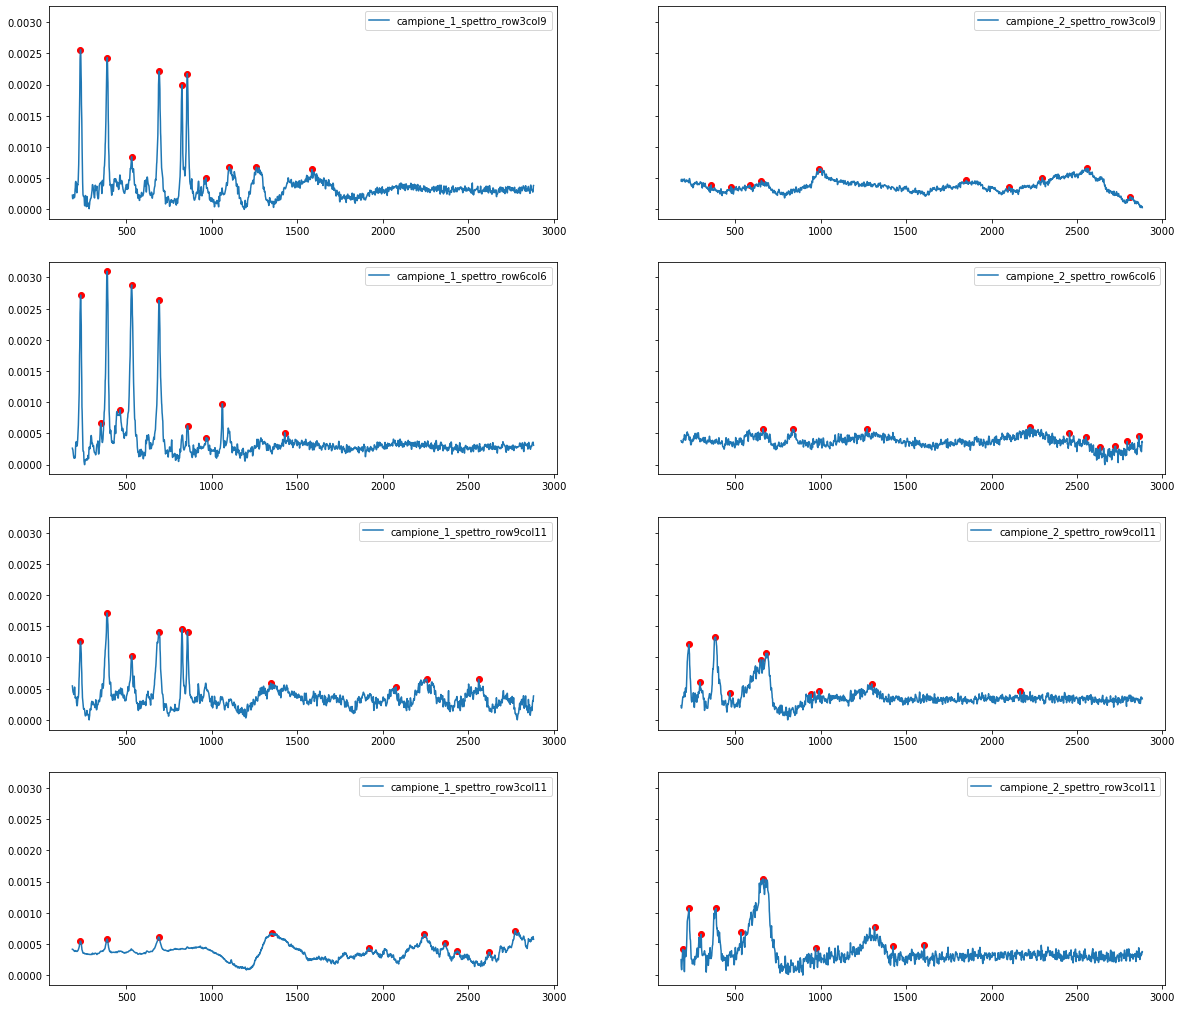

In [5]:

from src.classes import plot_spettri
plot_spettri(picchi1,picchi2,peaks=True)


### Come funziona scipy.signals.find_peaks?
le proprietà selezionabili come threshold o intervallo di accettazione per la ricerca di picchi sono:

- height : altezza rispetto allo zero 
- width : larghezza rispetto all'altezza in un intervallo di punti adiacenti customizzabile con il parametro **distance**
- prominence : parametro **fondamentale** , determina quello che anhe ad occhio diremo un picco evidente
- threshold


### Come cambia il numero di picchi trovati con i limiti sui nostri parametri?

#### PROMINENCE [spoiler : sarà il parametro favorito per la classificazione dei picchi]

<AxesSubplot:title={'center':'N_peaks found with varying prominence'}>

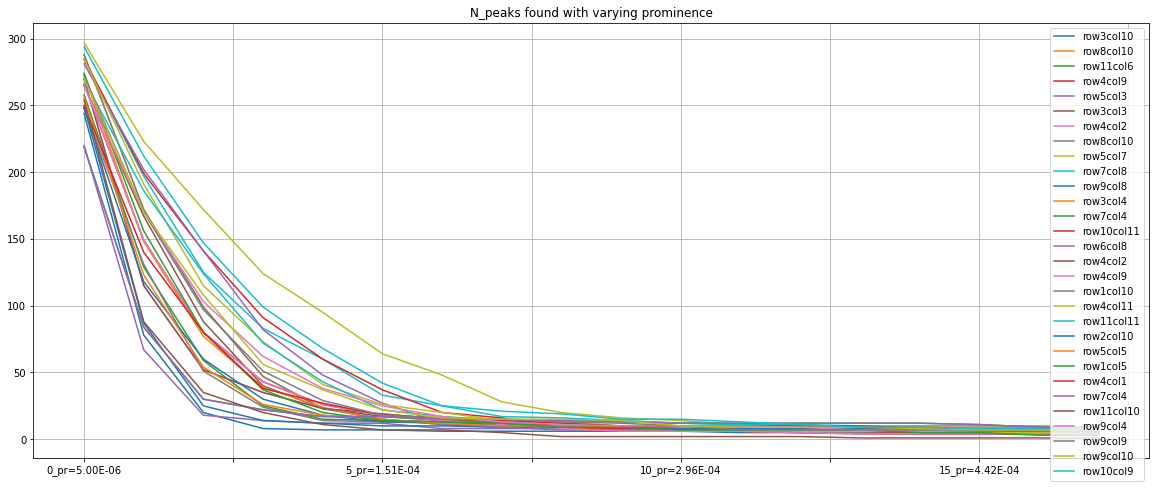

In [40]:
#
#come cambia in funzione della prominence il numero di picchi che vengono trovati?
dic = pd.DataFrame({})
featp = []
for n,pr in enumerate(np.linspace(0.5*10**-5,0.5*10**-3,18)):  # NOTARE INTERVALLO 10^-6  10^-5 
    cl = classes.Spettri(data1,npicchi=None,prop={'height':(None,None),'prominence':pr, 'width':(None,None)})
   
    cl.peakfinder()
    featp.append(cl.featextract(statlist=['mean','std','count'], cols=['widths','K','peak_heights','prominences']))
    dic[f'{n}_pr={pr:.2E}']= featp[n]['count']
    del cl
    
    
dic.T.iloc[:,choice([x for x in range(len(dic.T.columns))],30)].plot(figsize=(20,8),grid=True, xlim=(None,None), title='N_peaks found with varying prominence' )


#### HEIGHT [so-so]

<AxesSubplot:>

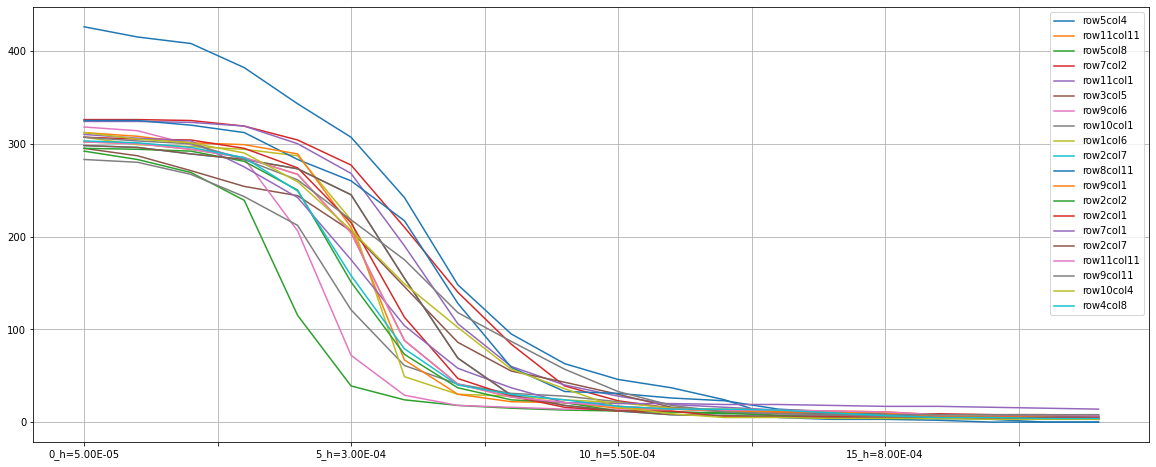

In [32]:
#come cambia in funzione della height il numero di picchi che vengono trovati?
dic = pd.DataFrame({})
feath = []
for n,pr in enumerate(np.linspace(0.5*10**-4,10**-3,20)): # INTERVALLO 10^-6 10-3
    cl = classes.Spettri(data1,npicchi=None,prop={'height':pr,'prominence':(None,None),'width':(None,None)})
    
    cl.peakfinder()
    feath.append(cl.featextract(statlist=['mean','std','count'], cols=['widths','K','peak_heights','prominences']))
    dic[f'{n}_h={pr:.2E}']= feath[n]['count']
    del cl
    
dic.T.iloc[:,choice([x for x in range(len(dic.T.columns))],20)].plot(figsize=(20,8),grid=True, xlim=(None,None))


#### WIDTH (BAD)  

Per la scala su cui cambia

Text(0, 0.5, 'n_picchi')

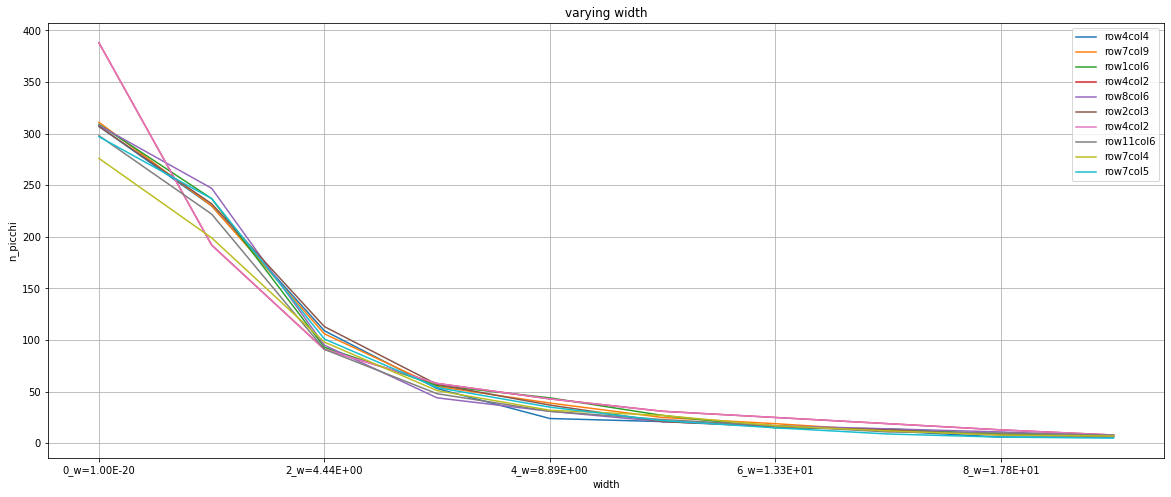

In [52]:
dic = pd.DataFrame({})
featw = []
for n,pr in enumerate(np.linspace(10**-20,20,10)): #INTERVALLO
    cl = classes.Spettri(data1,npicchi=None,prop={'height':(None,None),'prominence':(None,None),'width':pr})
    
    cl.peakfinder()
    featw.append( cl.featextract(statlist=['mean','std','count'], cols=['widths','K','peak_heights','prominences']))
    dic[f'{n}_w={pr:.2E}']= featw[n]['count']
    del cl
    
fig =dic.T.iloc[:,choice([x for x in range(len(dic.T.columns))],10)].plot(figsize=(20,8),grid=True, xlim=(None,None), title = 'varying width' )
plt.xlabel('width')
plt.ylabel('n_picchi')


### Prominence

Come sul plot sotto, è evidente che la prominence, almeno per i picchi trovati (quindi in ordine di prominenza i più alti), è molto simile all'altezza, anche se per esempio come parametro per la ricerca presentano notevoli differenze. Questo comportamento ovviamente è insito nel calcolo della aprominence usato da find_peaks....
il parametro importante che permette di differenziare notevolmente le suddette caratteristiche è **wlen**


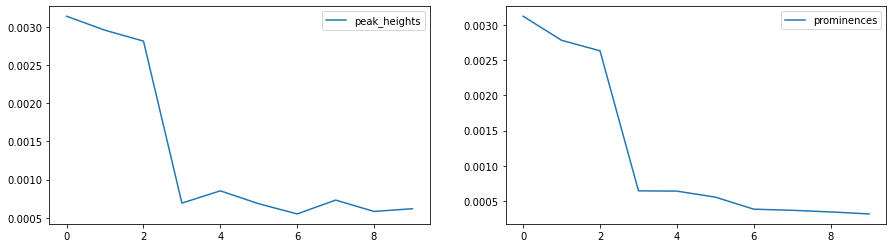

In [39]:
fig,ax = plt.subplots(1,2)

ax[0] = picchi1.picchi['row4col4'].plot( y = 'peak_heights', ax = ax[0], figsize = (15,4))
ax[1] = picchi1.picchi['row4col4'].plot(y = 'prominences', ax = ax[1]  , figsize = (15,4))

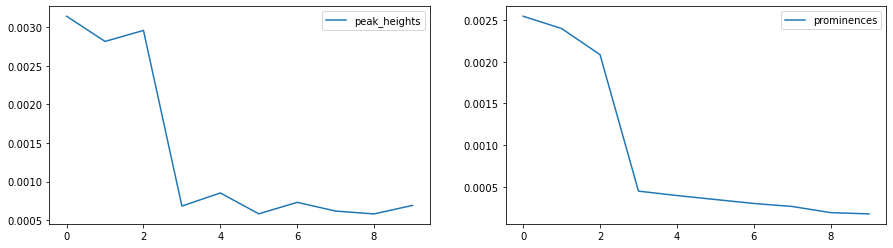

In [38]:
pk1test = classes.Spettri(data1)
pk1test.prop['wlen'] = 40
pk1test.peakfinder()
fig,ax = plt.subplots(1,2)
ax[0] = pk1test.picchi['row4col4'].plot( y = 'peak_heights', ax = ax[0], figsize = (15,4))
ax[1] = pk1test.picchi['row4col4'].plot(y = 'prominences', ax = ax[1]  , figsize = (15,4))

### OSSERVAZIONI:

**PROMINENCE**

- parametro affidabile nel pesare l'importanza relativa dei diversi picchi
- anche se molto legato ad height, è più importante nella classificazione del picco

**HEIGHT**

-  nel caso particolare di uno spettro senza background può sembrare quasi importante quanto la prominence nel pasare l'importanza del picco
- E' effettivamente un parametro fondamentale che probabilmente sarebbe da valutare su una scala relativa per via degli effeti della normalizzazione
 
**WIDTH** 

- meno affidabile la comparazione della relativa importanza tra i picchi

L'approccio che sembra causare meno grane dovute alla diversità possibile degli spettri, è di trovare tutti i picchi senza restrizioni e considerarne solo un numero fissato da *.npicchi*, anche se è possibile procedere in diversi modi per cui avrei anche implementato la classe, possono diventare poco informativi effettivamente.... (eventualmente spiegherò meglio a voce)

## Qualche plot per visualizzare spettri e picchi

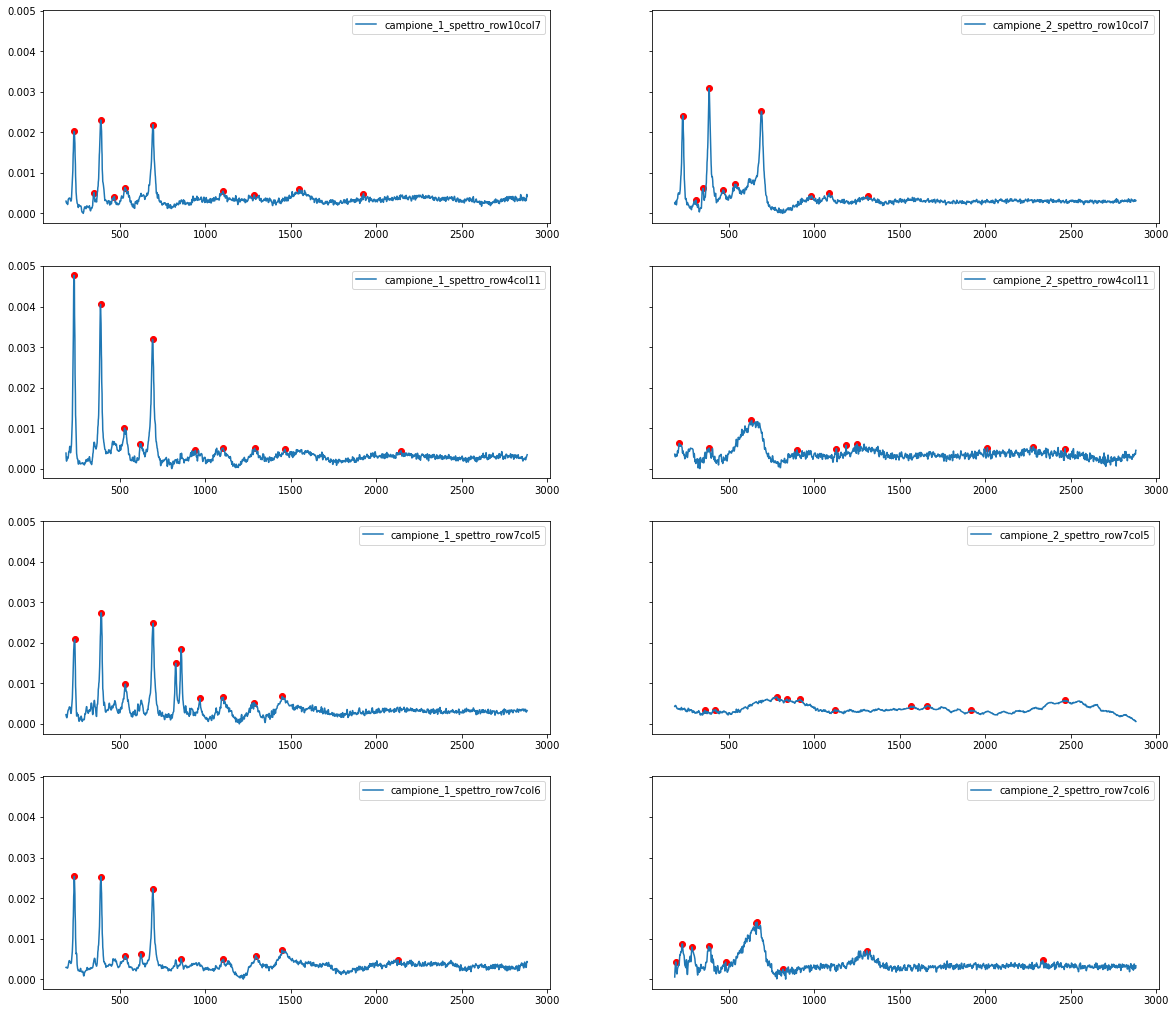

In [42]:
plot_spettri(picchi1,picchi2,peaks = True)

Passiamo ora al metodo

## *.featextract* 

Utilizzando il contenuto dell'attributo *.picchi* crea per ogni tabella di picchi un riga di **aspetti statistici** (tra quelli trattati da *pd.DataFrame.describe* di ogni proprietà, immagazzinando le righe in un dataframe all attributo **.feature**
in input opzionali ci sono **proplist** una lista di proprietà tra le colonne di *.picchi* e **statlist** una lista di proprietà tra le statistiche di *pd.DataFrame.describe()*

In [43]:
picchi1.featextract()
picchi2.featextract()
picchi1.feature.head()

,peak_heights_mean,peak_heights_std,prominences_mean,prominences_std,K_mean,K_std,widths_mean,widths_std
row1col1,0.001393,0.000933,0.001142,0.000891,755.9,290.457666,14.771225,4.979071
row1col2,0.002398,0.003256,0.002056,0.003080,678.4,293.283405,16.653478,8.001718
row1col3,0.000752,0.000376,0.000536,0.000453,787.1,497.763096,36.846067,34.434216
row1col4,0.001781,0.001611,0.001614,0.001673,653.6,339.142120,21.423697,13.805556
row1col5,0.001405,0.001354,0.001218,0.001396,670.1,379.500974,24.344327,15.522915


### Qualche  visualizzone di come si mostrano i campioni in questo spazio di feature 


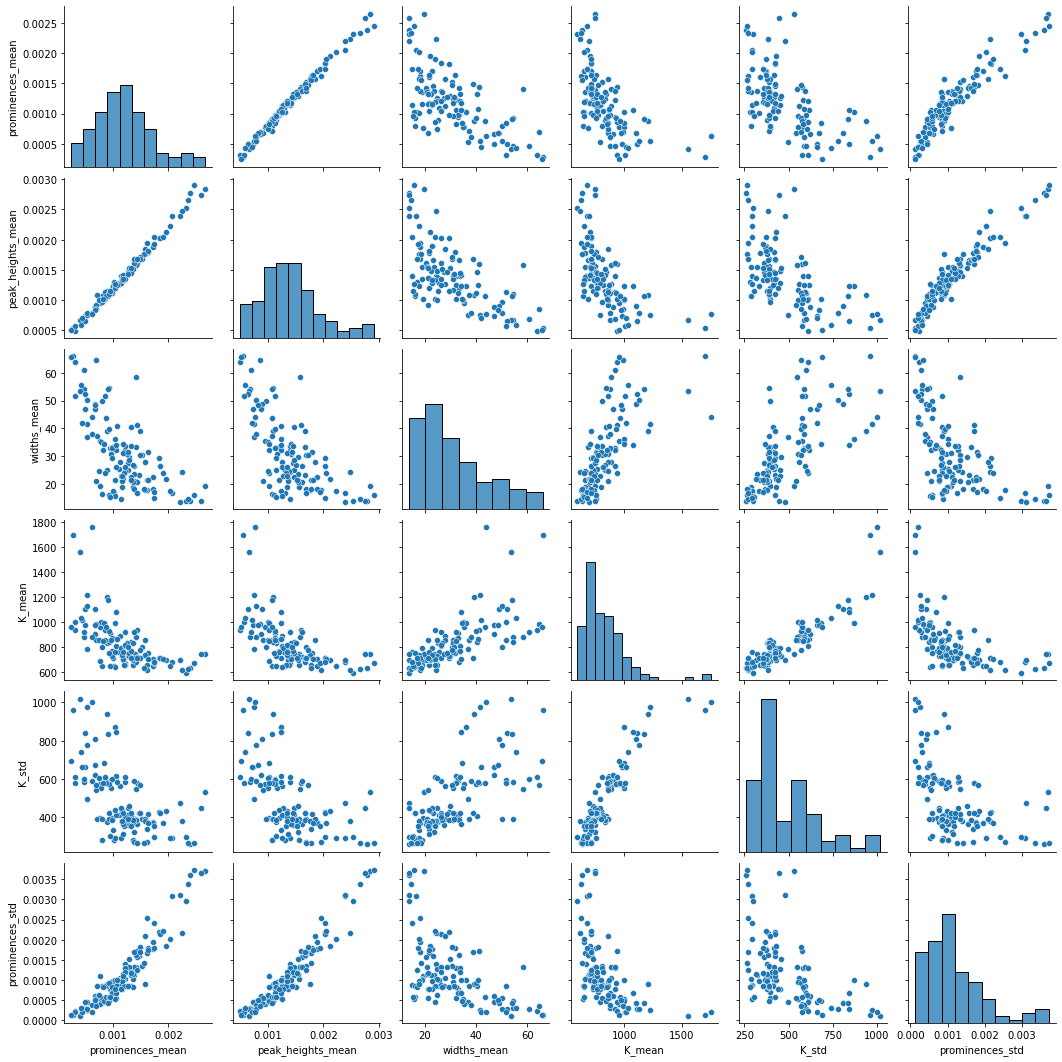

In [47]:
sns.pairplot(data = picchi1.feature, vars = ['prominences_mean','peak_heights_mean','widths_mean','K_mean' ,'K_std','prominences_std'])

In [ ]:
#sns.pairplot(data = picchi1.feature, vars = ['prominences_std','peak_heights_std','widths_std'])
#sns.pairplot(data = picchi2.feature, vars = ['prominences_mean','peak_heights_mean','widths_mean','K_mean'])
#sns.pairplot(data = featp[10], vars = ['prominences_mean','peak_heights_mean','widths_mean','K_mean','count'])

# .featextract2

Questo metodo di estrazione delle feature cerca, piuttosto che creare una statistica dell'insieme dei picchi trovati, di creare uno spazio basato sulla posizione, l'altezza e volendo anche la prominence di tutti i picchi trovati (ovviamente finiremo con l'avere una dimensionalità maggior3 aumentando il numero di picchi trovati)

accetta un parametro per tro

In [50]:
picchi1.featextract2()
picchi2.featextract2()
picchi1.feature2.head()

,pk_1_K,pk_1_peak_heights,pk_1_prominences,pk_1_widths,pk_2_K,pk_2_peak_heights,pk_2_prominences,pk_2_widths,pk_3_K,pk_3_peak_heights,...,pk_8_prominences,pk_8_widths,pk_9_K,pk_9_peak_heights,pk_9_prominences,pk_9_widths,pk_10_K,pk_10_peak_heights,pk_10_prominences,pk_10_widths
row1col1,824.0,0.003097,0.002965,11.439094,529.0,0.002187,0.002073,23.660844,856.0,0.002745,...,0.000441,17.363057,920.0,0.000613,0.000340,8.867026,1096.0,0.000590,0.000329,13.251919
row1col2,856.0,0.010139,0.010064,12.960988,824.0,0.006553,0.004642,9.182383,331.0,0.001209,...,0.000507,21.386689,433.0,0.000615,0.000442,14.123269,544.0,0.000636,0.000428,21.948999
row1col3,693.0,0.001606,0.001591,60.569170,315.0,0.000998,0.000878,54.626808,853.0,0.000777,...,0.000185,13.937232,956.0,0.000337,0.000134,6.781167,1850.0,0.000400,0.000104,4.746559
row1col4,693.0,0.004316,0.004279,16.364717,390.0,0.004266,0.004221,15.657152,233.0,0.003603,...,0.000440,30.226521,1293.0,0.000449,0.000334,56.410846,855.0,0.000359,0.000308,13.457686
row1col5,230.0,0.003665,0.003518,13.729251,386.0,0.003306,0.003208,16.520624,691.0,0.003095,...,0.000294,22.842386,623.0,0.000569,0.000275,15.826125,1468.0,0.000441,0.000226,60.528275


Queste sono solo prime considerazioni ed osservazioni generali sul modo di trattare i dati per quanto riguarda i campioni... in particolare non abbiamo ancora considerato i dati con il background

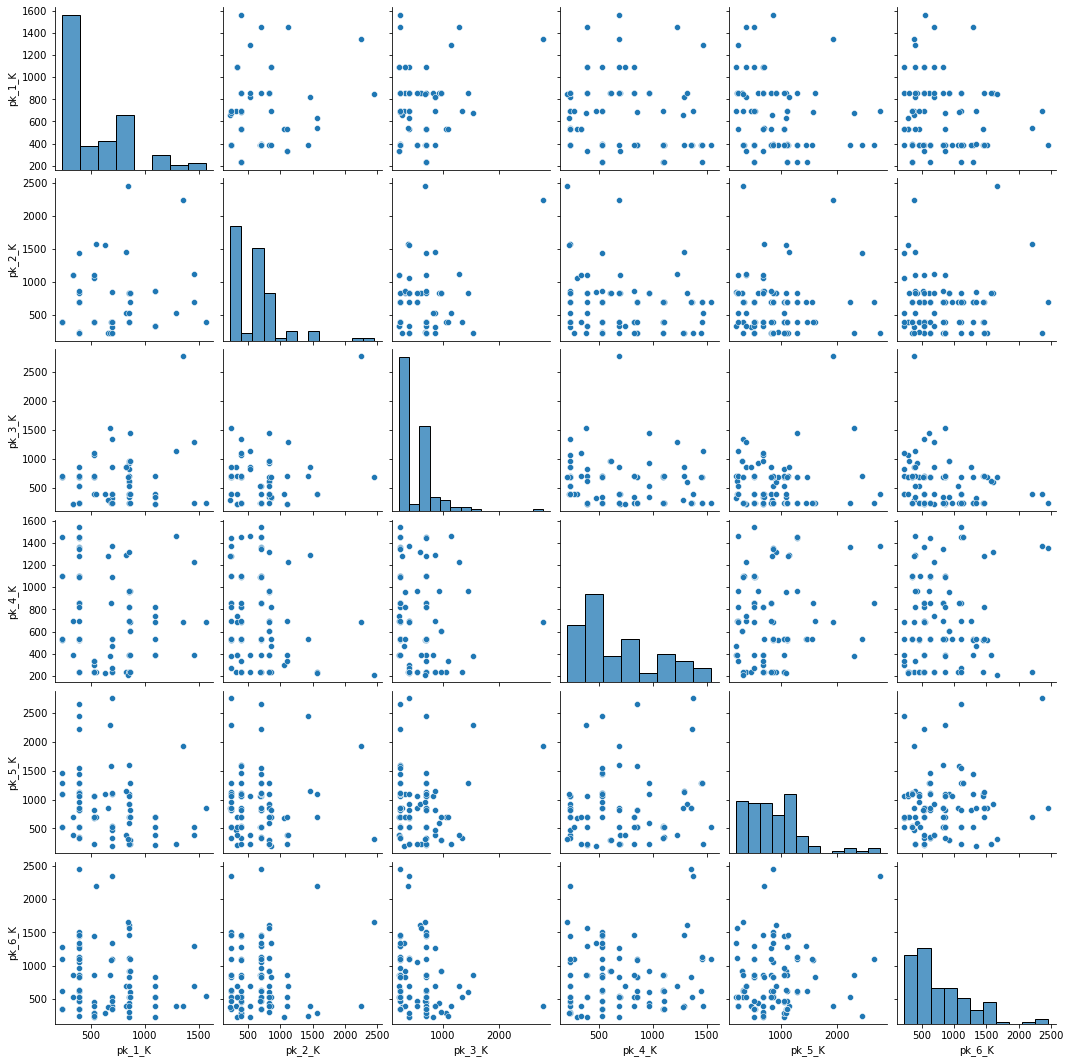

In [53]:
sns.pairplot(data = picchi1.feature2, vars = ['pk_1_K','pk_2_K', 'pk_3_K', 'pk_4_K', 'pk_5_K', 'pk_6_K'])

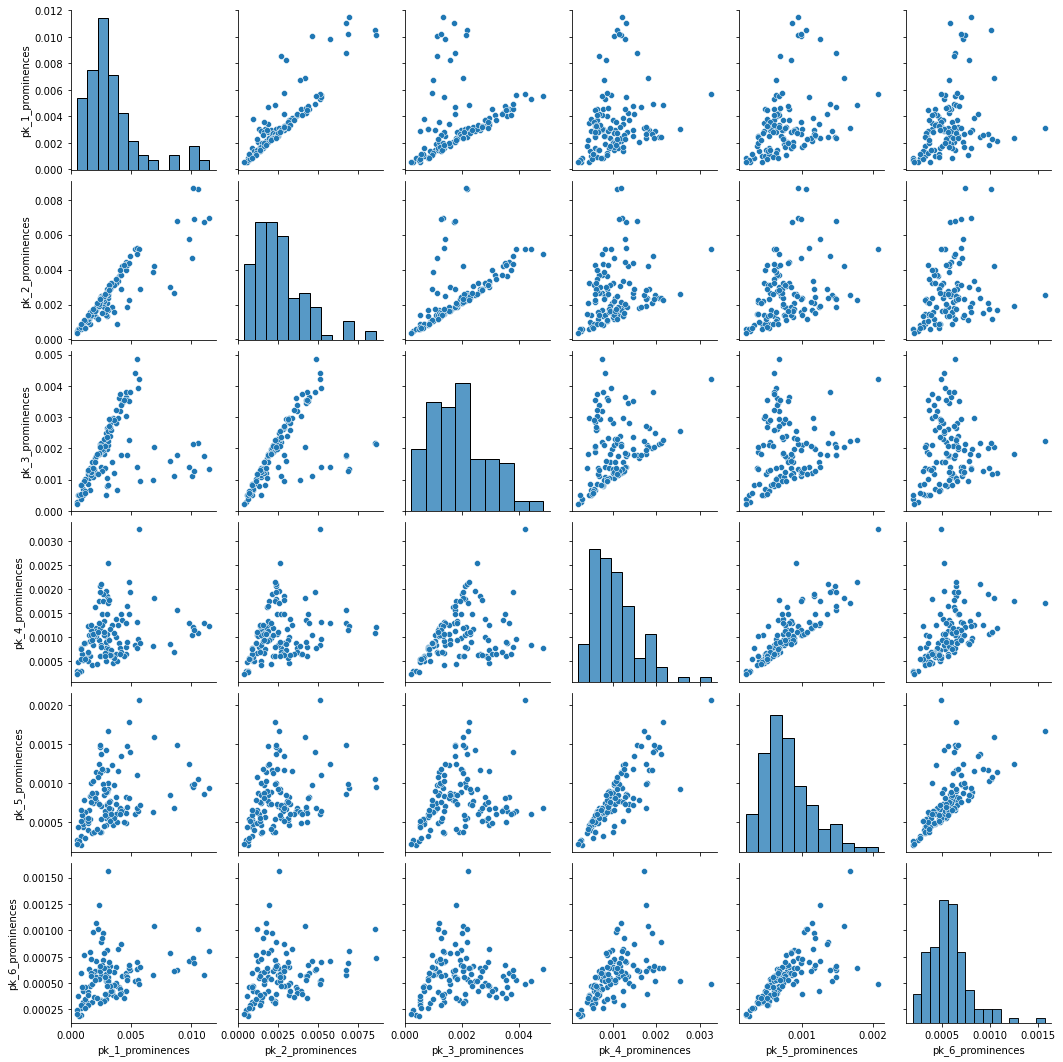

In [54]:
sns.pairplot(data = picchi1.feature2, vars = ['pk_1_prominences', 'pk_2_prominences', 'pk_3_prominences', 'pk_4_prominences', 'pk_5_prominences', 'pk_6_prominences'])